In [1]:
import os
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)

import catboost
print(catboost.__version__)

1.0.4


In [2]:
from catboost.datasets import amazon

(train_df, test_df) = amazon()

In [3]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
y = train_df.ACTION
X = train_df.drop('ACTION', axis = 1)

In [5]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [6]:
X.shape[1]

9

In [7]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 1897, One count = 30872


In [8]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100)
model.fit(X, y, cat_features=cat_features, verbose=10)

Learning rate set to 0.377604
0:	learn: 0.4528598	total: 170ms	remaining: 16.8s
10:	learn: 0.1744186	total: 420ms	remaining: 3.4s
20:	learn: 0.1676119	total: 678ms	remaining: 2.55s
30:	learn: 0.1652446	total: 937ms	remaining: 2.09s
40:	learn: 0.1633644	total: 1.19s	remaining: 1.71s
50:	learn: 0.1621892	total: 1.45s	remaining: 1.39s
60:	learn: 0.1609164	total: 1.74s	remaining: 1.11s
70:	learn: 0.1594572	total: 2.05s	remaining: 837ms
80:	learn: 0.1585876	total: 2.29s	remaining: 538ms
90:	learn: 0.1573593	total: 2.54s	remaining: 251ms
99:	learn: 0.1566977	total: 2.79s	remaining: 0us


In [9]:
model.predict_proba(X)

array([[0.0098, 0.9902],
       [0.0101, 0.9899],
       [0.0579, 0.9421],
       ...,
       [0.0118, 0.9882],
       [0.1891, 0.8109],
       [0.0235, 0.9765]])

In [10]:
from catboost import Pool
pool = Pool(data=X, label=y, cat_features=cat_features)

In [11]:
from sklearn.model_selection import train_test_split

data = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_validation, y_train, y_validation = data

train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features
)

validation_pool = Pool(
    data=X_validation,
    label=y_validation,
    cat_features=cat_features
)

In [12]:
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    # Loss_function='CrossEntropy'
)

model.fit(train_pool, eval_set=validation_pool, verbose=True)

#print('Model is fitted: {}'.format(model.is_fitted()))
#print('Model params: \n{}'.format(model.get_params()))

0:	learn: 0.6189489	test: 0.6187790	best: 0.6187790 (0)	total: 19.2ms	remaining: 1.9s
1:	learn: 0.5585414	test: 0.5579742	best: 0.5579742 (1)	total: 44.8ms	remaining: 2.19s
2:	learn: 0.5083288	test: 0.5075307	best: 0.5075307 (2)	total: 57.4ms	remaining: 1.86s
3:	learn: 0.4661280	test: 0.4649882	best: 0.4649882 (3)	total: 76.4ms	remaining: 1.83s
4:	learn: 0.4305277	test: 0.4291119	best: 0.4291119 (4)	total: 95.8ms	remaining: 1.82s
5:	learn: 0.4003061	test: 0.3987803	best: 0.3987803 (5)	total: 111ms	remaining: 1.74s
6:	learn: 0.3745630	test: 0.3729450	best: 0.3729450 (6)	total: 131ms	remaining: 1.74s
7:	learn: 0.3523729	test: 0.3506118	best: 0.3506118 (7)	total: 154ms	remaining: 1.76s
8:	learn: 0.3332246	test: 0.3311888	best: 0.3311888 (8)	total: 176ms	remaining: 1.78s
9:	learn: 0.3165986	test: 0.3145048	best: 0.3145048 (9)	total: 199ms	remaining: 1.79s
10:	learn: 0.3023734	test: 0.3000875	best: 0.3000875 (10)	total: 218ms	remaining: 1.76s
11:	learn: 0.2901230	test: 0.2875253	best: 0.287

In [13]:
model = CatBoostClassifier(
    iterations=50,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

model.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [14]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=100,
    train_dir='learning_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=100,
    train_dir='learning_rate_0.01'
)

model1.fit(train_pool, eval_set=validation_pool, verbose=20)
model2.fit(train_pool, eval_set=validation_pool, verbose=20);

0:	learn: 0.3264513	test: 0.3248170	best: 0.3248170 (0)	total: 19.8ms	remaining: 1.97s
20:	learn: 0.1688825	test: 0.1574182	best: 0.1573949 (16)	total: 517ms	remaining: 1.95s
40:	learn: 0.1632884	test: 0.1582531	best: 0.1571533 (23)	total: 1.04s	remaining: 1.5s
60:	learn: 0.1584388	test: 0.1573279	best: 0.1569712 (52)	total: 1.53s	remaining: 979ms
80:	learn: 0.1544282	test: 0.1583794	best: 0.1569712 (52)	total: 2.02s	remaining: 474ms
99:	learn: 0.1510415	test: 0.1583995	best: 0.1569712 (52)	total: 2.53s	remaining: 0us

bestTest = 0.1569712214
bestIteration = 52

Shrink model to first 53 iterations.
0:	learn: 0.6853769	test: 0.6853610	best: 0.6853610 (0)	total: 19.1ms	remaining: 1.89s
20:	learn: 0.5575578	test: 0.5568257	best: 0.5568257 (20)	total: 367ms	remaining: 1.38s
40:	learn: 0.4678112	test: 0.4663769	best: 0.4663769 (40)	total: 722ms	remaining: 1.04s
60:	learn: 0.4029225	test: 0.4011544	best: 0.4011544 (60)	total: 1.03s	remaining: 658ms
80:	learn: 0.3551621	test: 0.3530433	best: 

In [15]:
from catboost import MetricVisualizer
MetricVisualizer(['learning_rate_0.7', 'learning_rate_0.01']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [16]:
from catboost import cv

params = {
        'loss_function': 'Logloss',
        'iterations': 80,
        'custom_loss': 'AUC',
        'learning_rate': 0.5
}

cv_data = cv(
    params=params,
    pool=train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.1628656559
bestIteration = 73

Training on fold [1/5]

bestTest = 0.1608272543
bestIteration = 77

Training on fold [2/5]

bestTest = 0.1694535356
bestIteration = 12

Training on fold [3/5]

bestTest = 0.1580851721
bestIteration = 20

Training on fold [4/5]

bestTest = 0.1644437541
bestIteration = 30



In [17]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.305831,0.000020,0.305810,0.000014,0.496175,0.014042
1,1,0.234755,0.001020,0.235427,0.000274,0.569789,0.030202
2,2,0.195193,0.002557,0.201974,0.002888,0.768281,0.022737
3,3,0.182217,0.001759,0.190774,0.001299,0.800747,0.006492
4,4,0.174577,0.002017,0.184617,0.001889,0.818512,0.010188


In [18]:
params = {
        'loss_function': 'Logloss',
        'iterations': 80,
        'custom_loss': 'AUC',
        'learning_rate': 0.5
}

cv_data = cv(
    params=params,
    pool=train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.1524159074
bestIteration = 40

Training on fold [1/5]

bestTest = 0.1702343283
bestIteration = 58

Training on fold [2/5]

bestTest = 0.1652713561
bestIteration = 49

Training on fold [3/5]

bestTest = 0.1506211193
bestIteration = 37

Training on fold [4/5]

bestTest = 0.1693370995
bestIteration = 41



In [19]:
from sklearn.model_selection import GridSearchCV

#param_grid = {
#    "learning_rate": [0.001, 0.1, 0.5],
#}

clf = CatBoostClassifier(
    iterations=50,
    cat_features=cat_features,
    verbose=True
)

grid = {'learning_rate': [0.001, 0.1, 0.5],
        'depth': [4, 6, 10],
       # 'l2_leaf_reg': [1, 3, 5, 7, 9]
       }

grid_search_result = clf.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6918854	test: 0.6918785	best: 0.6918785 (0)	total: 21.6ms	remaining: 1.06s
1:	learn: 0.6906739	test: 0.6906710	best: 0.6906710 (1)	total: 37.3ms	remaining: 895ms
2:	learn: 0.6894655	test: 0.6894665	best: 0.6894665 (2)	total: 45.8ms	remaining: 718ms
3:	learn: 0.6882389	test: 0.6882550	best: 0.6882550 (3)	total: 67.9ms	remaining: 781ms
4:	learn: 0.6869603	test: 0.6869852	best: 0.6869852 (4)	total: 90.6ms	remaining: 815ms
5:	learn: 0.6857431	test: 0.6857739	best: 0.6857739 (5)	total: 108ms	remaining: 789ms
6:	learn: 0.6845474	test: 0.6845823	best: 0.6845823 (6)	total: 120ms	remaining: 738ms
7:	learn: 0.6832879	test: 0.6833228	best: 0.6833228 (7)	total: 137ms	remaining: 722ms
8:	learn: 0.6820983	test: 0.6821371	best: 0.6821371 (8)	total: 146ms	remaining: 665ms
9:	learn: 0.6809117	test: 0.6809544	best: 0.6809544 (9)	total: 155ms	remaining: 620ms
10:	learn: 0.6797282	test: 0.6797748	best: 0.6797748 (10)	total: 163ms	remaining: 579ms
11:	learn: 0.6785294	test: 0.6785662	best: 0.67

1:	learn: 0.2290415	test: 0.2325465	best: 0.2325465 (1)	total: 61.5ms	remaining: 1.48s
2:	learn: 0.2009940	test: 0.2001142	best: 0.2001142 (2)	total: 83.3ms	remaining: 1.3s
3:	learn: 0.1915768	test: 0.1877552	best: 0.1877552 (3)	total: 106ms	remaining: 1.21s
4:	learn: 0.1858242	test: 0.1805171	best: 0.1805171 (4)	total: 126ms	remaining: 1.14s
5:	learn: 0.1836349	test: 0.1785716	best: 0.1785716 (5)	total: 150ms	remaining: 1.1s
6:	learn: 0.1804357	test: 0.1765349	best: 0.1765349 (6)	total: 171ms	remaining: 1.05s
7:	learn: 0.1790145	test: 0.1757888	best: 0.1757888 (7)	total: 196ms	remaining: 1.03s
8:	learn: 0.1788070	test: 0.1754845	best: 0.1754845 (8)	total: 227ms	remaining: 1.03s
9:	learn: 0.1784357	test: 0.1751946	best: 0.1751946 (9)	total: 258ms	remaining: 1.03s
10:	learn: 0.1780829	test: 0.1752617	best: 0.1751946 (9)	total: 290ms	remaining: 1.03s
11:	learn: 0.1775255	test: 0.1746480	best: 0.1746480 (11)	total: 312ms	remaining: 989ms
12:	learn: 0.1761041	test: 0.1720158	best: 0.172015

48:	learn: 0.6359128	test: 0.6359816	best: 0.6359816 (48)	total: 1.07s	remaining: 21.8ms
49:	learn: 0.6348445	test: 0.6349172	best: 0.6349172 (49)	total: 1.08s	remaining: 0us

bestTest = 0.6349172469
bestIteration = 49

3:	loss: 0.6349172	best: 0.1695435 (2)	total: 4.71s	remaining: 5.89s
0:	learn: 0.5770532	test: 0.5765436	best: 0.5765436 (0)	total: 19.5ms	remaining: 957ms
1:	learn: 0.4915239	test: 0.4915317	best: 0.4915317 (1)	total: 34.3ms	remaining: 823ms
2:	learn: 0.4269991	test: 0.4275753	best: 0.4275753 (2)	total: 48.9ms	remaining: 766ms
3:	learn: 0.3756950	test: 0.3764308	best: 0.3764308 (3)	total: 61.9ms	remaining: 712ms
4:	learn: 0.3380821	test: 0.3391521	best: 0.3391521 (4)	total: 79.2ms	remaining: 712ms
5:	learn: 0.3088370	test: 0.3106165	best: 0.3106165 (5)	total: 99.8ms	remaining: 732ms
6:	learn: 0.2868147	test: 0.2888786	best: 0.2888786 (6)	total: 125ms	remaining: 768ms
7:	learn: 0.2712093	test: 0.2734838	best: 0.2734838 (7)	total: 137ms	remaining: 722ms
8:	learn: 0.25885

45:	learn: 0.1532662	test: 0.1709716	best: 0.1704028 (44)	total: 1.42s	remaining: 123ms
46:	learn: 0.1528488	test: 0.1709516	best: 0.1704028 (44)	total: 1.45s	remaining: 92.3ms
47:	learn: 0.1522131	test: 0.1704510	best: 0.1704028 (44)	total: 1.48s	remaining: 61.5ms
48:	learn: 0.1518017	test: 0.1703124	best: 0.1703124 (48)	total: 1.5s	remaining: 30.7ms
49:	learn: 0.1517131	test: 0.1703417	best: 0.1703124 (48)	total: 1.53s	remaining: 0us

bestTest = 0.1703123547
bestIteration = 48

5:	loss: 0.1703124	best: 0.1695435 (2)	total: 7.68s	remaining: 3.84s
0:	learn: 0.6918854	test: 0.6918785	best: 0.6918785 (0)	total: 20.3ms	remaining: 994ms
1:	learn: 0.6906739	test: 0.6906710	best: 0.6906710 (1)	total: 36ms	remaining: 864ms
2:	learn: 0.6894655	test: 0.6894665	best: 0.6894665 (2)	total: 45.1ms	remaining: 706ms
3:	learn: 0.6882389	test: 0.6882550	best: 0.6882550 (3)	total: 63.8ms	remaining: 734ms
4:	learn: 0.6869597	test: 0.6869861	best: 0.6869861 (4)	total: 94.5ms	remaining: 851ms
5:	learn: 0.6

37:	learn: 0.1575854	test: 0.1700374	best: 0.1700374 (37)	total: 1.81s	remaining: 573ms
38:	learn: 0.1562886	test: 0.1699914	best: 0.1699914 (38)	total: 1.87s	remaining: 528ms
39:	learn: 0.1548656	test: 0.1696335	best: 0.1696335 (39)	total: 1.93s	remaining: 482ms
40:	learn: 0.1541453	test: 0.1692850	best: 0.1692850 (40)	total: 1.99s	remaining: 438ms
41:	learn: 0.1531405	test: 0.1692101	best: 0.1692101 (41)	total: 2.07s	remaining: 395ms
42:	learn: 0.1521635	test: 0.1692163	best: 0.1692101 (41)	total: 2.15s	remaining: 350ms
43:	learn: 0.1514446	test: 0.1691565	best: 0.1691565 (43)	total: 2.21s	remaining: 301ms
44:	learn: 0.1508092	test: 0.1689810	best: 0.1689810 (44)	total: 2.27s	remaining: 252ms
45:	learn: 0.1502603	test: 0.1688621	best: 0.1688621 (45)	total: 2.33s	remaining: 203ms
46:	learn: 0.1496682	test: 0.1687081	best: 0.1687081 (46)	total: 2.4s	remaining: 153ms
47:	learn: 0.1487701	test: 0.1688047	best: 0.1687081 (46)	total: 2.46s	remaining: 102ms
48:	learn: 0.1482650	test: 0.1687

29:	learn: 0.1708256	test: 0.1722360	best: 0.1722360 (29)	total: 1.31s	remaining: 872ms
30:	learn: 0.1699919	test: 0.1716078	best: 0.1716078 (30)	total: 1.36s	remaining: 836ms
31:	learn: 0.1688236	test: 0.1711664	best: 0.1711664 (31)	total: 1.42s	remaining: 800ms
32:	learn: 0.1667959	test: 0.1706683	best: 0.1706683 (32)	total: 1.48s	remaining: 762ms
33:	learn: 0.1649378	test: 0.1700779	best: 0.1700779 (33)	total: 1.53s	remaining: 723ms
34:	learn: 0.1637320	test: 0.1694530	best: 0.1694530 (34)	total: 1.59s	remaining: 682ms
35:	learn: 0.1618007	test: 0.1689085	best: 0.1689085 (35)	total: 1.65s	remaining: 643ms
36:	learn: 0.1611345	test: 0.1684035	best: 0.1684035 (36)	total: 1.71s	remaining: 601ms
37:	learn: 0.1604951	test: 0.1681677	best: 0.1681677 (37)	total: 1.77s	remaining: 558ms
38:	learn: 0.1598100	test: 0.1677708	best: 0.1677708 (38)	total: 1.82s	remaining: 514ms
39:	learn: 0.1589803	test: 0.1674961	best: 0.1674961 (39)	total: 1.88s	remaining: 470ms
40:	learn: 0.1567238	test: 0.167

22:	learn: 0.1815197	test: 0.1809986	best: 0.1809986 (22)	total: 887ms	remaining: 1.04s
23:	learn: 0.1796249	test: 0.1796281	best: 0.1796281 (23)	total: 944ms	remaining: 1.02s
24:	learn: 0.1791171	test: 0.1788893	best: 0.1788893 (24)	total: 955ms	remaining: 955ms
25:	learn: 0.1771144	test: 0.1778793	best: 0.1778793 (25)	total: 1.01s	remaining: 935ms
26:	learn: 0.1753729	test: 0.1768337	best: 0.1768337 (26)	total: 1.07s	remaining: 910ms
27:	learn: 0.1734090	test: 0.1756405	best: 0.1756405 (27)	total: 1.13s	remaining: 885ms
28:	learn: 0.1722607	test: 0.1752098	best: 0.1752098 (28)	total: 1.19s	remaining: 860ms
29:	learn: 0.1707279	test: 0.1743358	best: 0.1743358 (29)	total: 1.25s	remaining: 833ms
30:	learn: 0.1693642	test: 0.1733536	best: 0.1733536 (30)	total: 1.31s	remaining: 802ms
31:	learn: 0.1686272	test: 0.1729137	best: 0.1729137 (31)	total: 1.36s	remaining: 768ms
32:	learn: 0.1673966	test: 0.1725914	best: 0.1725914 (32)	total: 1.42s	remaining: 733ms
33:	learn: 0.1661034	test: 0.171

In [20]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    learning_rate=0.5,
    early_stopping_rounds=20
)

model_with_early_stop.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [21]:
print(model_with_early_stop.tree_count_)

20


In [22]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    eval_metric='AUC',
    learning_rate=0.5,
    early_stopping_rounds=20
)

model_with_early_stop.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
model = CatBoostClassifier(iterations=200, learning_rate=0.03)
model.fit(train_pool, verbose=50)

0:	learn: 0.6569432	total: 35.8ms	remaining: 7.13s
50:	learn: 0.1950236	total: 1.65s	remaining: 4.83s
100:	learn: 0.1659102	total: 4.09s	remaining: 4.01s
150:	learn: 0.1594239	total: 6.81s	remaining: 2.21s
199:	learn: 0.1557078	total: 9.72s	remaining: 0us


In [24]:
print(model.predict(X_validation))

[1 1 1 ... 1 1 1]


In [25]:
print(model.predict_proba(X_validation))

[[0.0282 0.9718]
 [0.0226 0.9774]
 [0.0106 0.9894]
 ...
 [0.0327 0.9673]
 [0.0551 0.9449]
 [0.0208 0.9792]]


In [26]:
raw_pred = model.predict(
    X_validation,
prediction_type='RawFormulaVal'
)

print(raw_pred)

[3.539  3.766  4.5357 ... 3.3887 2.841  3.8532]


In [27]:
from numpy import exp

sigmoid = lambda x: 1 / (1 + exp (-x))
probabilities = sigmoid(raw_pred)

print(probabilities)

[0.9718 0.9774 0.9894 ... 0.9673 0.9449 0.9792]


In [28]:
import matplotlib.pyplot as plt
from catboost.utils import get_roc_curve
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

curve = get_roc_curve(model, validation_pool)
(fpr, tpr, thresholds) = curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve (curve=curve)

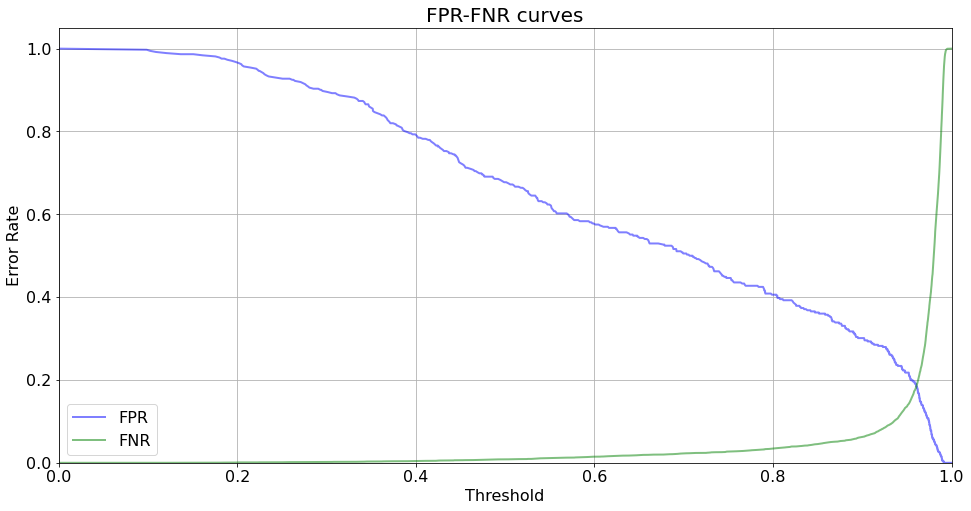

In [29]:
plt.figure(figsize=(16, 8))
style = {'alpha': 0.5, 'lw':2}
        
plt.plot(thresholds, fpr, color='blue', label='FPR', **style)
plt.plot(thresholds, fnr, color='green', label='FNR', **style)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16);

In [30]:
from catboost.utils import select_threshold

print(select_threshold(model,validation_pool, FNR=0.01))
print(select_threshold(model,validation_pool, FPR=0.01))

0.5337729846744328
0.9892346874487998


In [31]:
metrics = model.eval_metrics(
    data=validation_pool,
    metrics=['Logloss', 'AUC'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [32]:
np.array(model.get_feature_importance(prettified=True))

array([['RESOURCE', 23.128984196712224],
       ['MGR_ID', 17.16283536114714],
       ['ROLE_DEPTNAME', 16.38428781953501],
       ['ROLE_TITLE', 11.316622915491589],
       ['ROLE_FAMILY_DESC', 9.34018641066491],
       ['ROLE_ROLLUP_2', 9.150227621584985],
       ['ROLE_FAMILY', 7.8804127767064385],
       ['ROLE_ROLLUP_1', 3.020475101606297],
       ['ROLE_CODE', 2.6159677965514425]], dtype=object)

In [33]:
np.array(model.get_feature_importance(train_pool, 'LossFunctionChange', prettified=True))

array([['RESOURCE', 0.020505203019680743],
       ['MGR_ID', 0.017745167534858677],
       ['ROLE_TITLE', 0.011304085288719656],
       ['ROLE_DEPTNAME', 0.010905741866539453],
       ['ROLE_FAMILY_DESC', 0.009183313919737111],
       ['ROLE_ROLLUP_2', 0.004786538209834321],
       ['ROLE_FAMILY', 0.0008549666190223527],
       ['ROLE_CODE', 0.0004962676889237183],
       ['ROLE_ROLLUP_1', 3.553540996508822e-05]], dtype=object)

In [34]:
print(model.predict_proba([X.iloc[1,:]]))
print(model.predict_proba([X.iloc[91,:]]))


[[0.0104 0.9896]]
[[0.5469 0.4531]]


In [35]:
shap_values = model.get_feature_importance(
    validation_pool,
    'ShapValues',
)

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(6554, 9)


In [36]:
proba = model.predict_proba([X.iloc[1,:]])[0]
raw = model.predict([X.iloc[1,:]], prediction_type='RawFormulaVal')[0]
print('Probabilities', proba)
print('RawFormulaVal %.4f' % raw)
print('Probability from raw value %.4f' % sigmoid(raw))

Probabilities [0.0104 0.9896]
RawFormulaVal 4.5562
Probability from raw value 0.9896


In [44]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[1,:], X_validation.iloc[1,:],)

In [38]:
proba = model.predict_proba([X.iloc[91,:]])[0]
raw = model.predict([X.iloc[91,:]], prediction_type='RawFormulaVal')[0]
print('Probabilities', proba)
print('RawFormulaVal %.4f' % raw)
print('Probability from raw value %.4f' % sigmoid(raw))

Probabilities [0.5469 0.4531]
RawFormulaVal -0.1881
Probability from raw value 0.4531


In [39]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[91,:], X_validation.iloc[91,:])

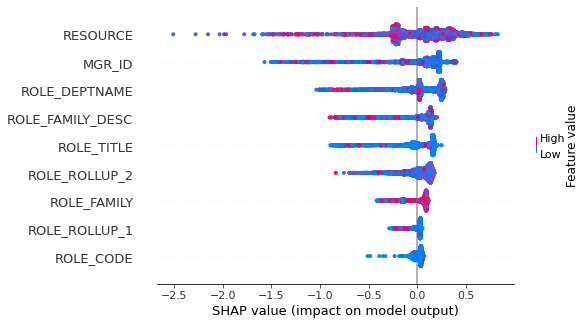

In [40]:
shap.summary_plot(shap_values, X_validation)

In [75]:
model = CatBoostClassifier(
    iterations=100,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
    snapshot_interval=1,
)

model.fit(train_pool, eval_set=validation_pool, verbose=10)

Learning rate set to 0.193326
0:	learn: 0.5566769	test: 0.5563281	best: 0.5563281 (0)	total: 21ms	remaining: 2.08s
10:	learn: 0.2178466	test: 0.2133204	best: 0.2133204 (10)	total: 269ms	remaining: 2.17s
20:	learn: 0.1814093	test: 0.1725174	best: 0.1725174 (20)	total: 520ms	remaining: 1.95s
30:	learn: 0.1747026	test: 0.1623252	best: 0.1623252 (30)	total: 812ms	remaining: 1.81s
40:	learn: 0.1730095	test: 0.1605745	best: 0.1605745 (40)	total: 1.09s	remaining: 1.57s
50:	learn: 0.1712531	test: 0.1592140	best: 0.1592140 (50)	total: 1.35s	remaining: 1.3s
60:	learn: 0.1699903	test: 0.1583589	best: 0.1583589 (60)	total: 1.72s	remaining: 1.1s
70:	learn: 0.1696087	test: 0.1582369	best: 0.1582042 (66)	total: 2s	remaining: 817ms
80:	learn: 0.1681471	test: 0.1573081	best: 0.1573081 (80)	total: 2.32s	remaining: 545ms
90:	learn: 0.1673316	test: 0.1575898	best: 0.1573067 (81)	total: 2.6s	remaining: 257ms
99:	learn: 0.1668035	test: 0.1574311	best: 0.1573067 (81)	total: 2.83s	remaining: 0us

bestTest = 0

In [76]:
!chcp 65001
!dir catboost_info\snapshot.bkp

Active code page: 65001
 Volume in drive D is DATA
 Volume Serial Number is CCB2-A156

 Directory of D:\DS\jupyter\catboost\catboost_info

14.02.2022  23:32         1В 279В 536 snapshot.bkp
               1 File(s)      1В 279В 536 bytes
               0 Dir(s)  239В 443В 402В 752 bytes free


In [77]:
model = CatBoostClassifier(iterations=10)
model.fit(train_pool, eval_set=validation_pool, verbose=False)
model.save_model('catboost_model.bin')
model.save_model('catboost_model.json', format='json')


In [78]:
model.load_model('catboost_model.bin')
print(model.get_params())
print(model.learning_rate_)


{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0.5
